<a href="https://colab.research.google.com/github/devarshh08/Breast-Cancer-Classification/blob/main/Breast-Cancer-Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

Importing the dataset

In [152]:
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [153]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

Tumors are classified as benign and malignant.

Benign tumors do not spread to part of body and are not harmful.

Malignant tumors are harmful.

In [154]:
#loading data to a dataframe

df = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [155]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [156]:
#adding the target column to our dataframe
df["label"] = breast_cancer_dataset.target

In [157]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [158]:
print(df.shape)
#we can see that there are 31 columns, where 30 are inputs and label is the output

(569, 31)


In [159]:
#checking for any missing values
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

There are no missing values

In [160]:
#statistical measures about data

df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [161]:
#checking value distribution for malignant and benign

df['label'].value_counts()

#we check this if there is a huge imbalance in the distribution, then we need to process the data by methods of upsampling/downsampling to make sure distribution is even

1    357
0    212
Name: label, dtype: int64

### 1 : Benign (Not Dangerous)
### 0 : Malignant (Dangerous)

In [162]:
#groups data points labelwise and gives mean value for each data point
df.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [163]:
#splitting this data into features and targets

X = df.drop(columns="label", axis=1)
Y = df["label"]

In [164]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [165]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64


In [166]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [167]:
#Standardize the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train) #we fit only with the training data
X_test_std = scaler.transform(X_test)       #here we do not fit, we only transform

In [168]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


Building the Neural Network

In [169]:
import tensorflow as tf
tf.random.set_seed(3) #we set a seed because when training a NN in keras, various weights and parameters are initialized, so each time you train your NN this is a random way of generating values so to counter that we set a random seed, to get a fixed set of values every time we train
from tensorflow import keras

Tensorflow is a DL library developed by Google.

Keras is a wrapper of tensorflow, it used tf at its backend.

In [170]:
#setting up the layers of the NN

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (30,)), #input layer
    keras.layers.Dense(units = 20, activation = "ReLU"), #hidden layer, all 20 units of hidden layer will have rectified linear activation function
    keras.layers.Dense(units = 2, activation = "sigmoid") #output layer, all 2 units of output layer will have sigmoid activation function
])

In [171]:
#Compiling the Neural Network

model.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              metrics=["accuracy"])

#when using the target variable as 0, 1, 2, 3 etc, we have to use sparse categorical cross entropy,
#and when you have one not encoded labels, you use categorical cross entropy

## Label Encoding and One not encoding:
Say we want to build a Neural Network that will predict whether image is dog, or cat or horse

say we label, (label encoding)

dog - 0

cat - 1

horse - 2

so whenever using target variable as this kind of integer labels, we use sparse categorical cross entropy as loss function.

And instead if you use one not encoding:

dog - [1 0 0]

cat - [0 1 0]

horse - [0 0 1]

in one not encoded labels, we use sparse categorical cross entropy and other loss functions available

In [172]:
#training the neural network

history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=10)  #X_train is features and Y_train is labels
                                                                        #validation is like the train test we are doing, it is just like train_test_split
                                                                        #epochs is like how many times your model has to go through the data

Epoch 1/10
13/13 [==============================] - 1s 19ms/step - loss: 0.5786 - accuracy: 0.7311 - val_loss: 0.3897 - val_accuracy: 0.9348
Epoch 2/10
13/13 [==============================] - 0s 5ms/step - loss: 0.4083 - accuracy: 0.8533 - val_loss: 0.2811 - val_accuracy: 0.9348
Epoch 3/10
13/13 [==============================] - 0s 5ms/step - loss: 0.3181 - accuracy: 0.9120 - val_loss: 0.2240 - val_accuracy: 0.9565
Epoch 4/10
13/13 [==============================] - 0s 5ms/step - loss: 0.2654 - accuracy: 0.9193 - val_loss: 0.1884 - val_accuracy: 0.9783
Epoch 5/10
13/13 [==============================] - 0s 5ms/step - loss: 0.2273 - accuracy: 0.9315 - val_loss: 0.1640 - val_accuracy: 0.9783
Epoch 6/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2001 - accuracy: 0.9438 - val_loss: 0.1468 - val_accuracy: 0.9783
Epoch 7/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1796 - accuracy: 0.9487 - val_loss: 0.1333 - val_accuracy: 0.9783
Epoch 8/10
13/13 [=

Visualizing Accuracy

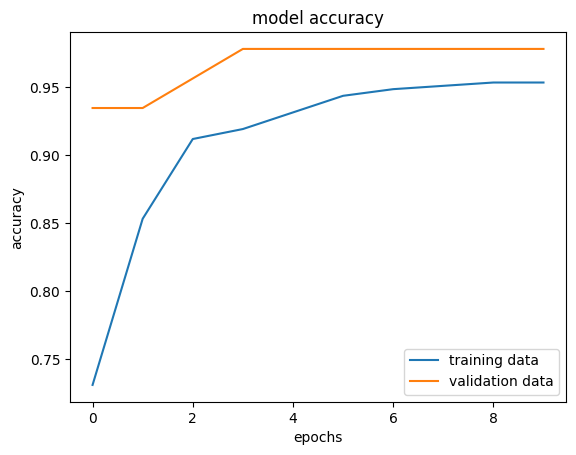

In [173]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['training data', 'validation data'], loc=4) #can also use loc = 'lower right'

plt.show()

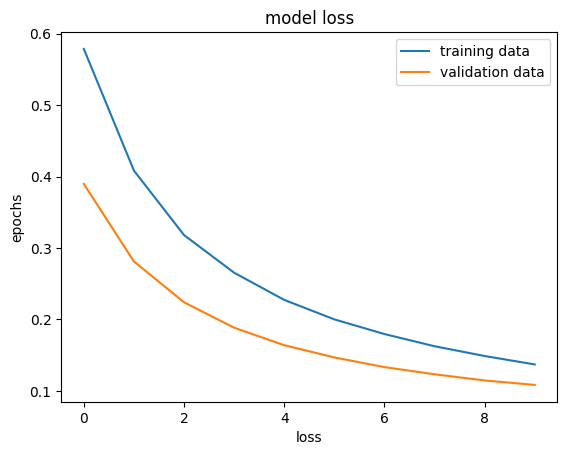

In [174]:
#Visualizing loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.xlabel('loss')
plt.ylabel('epochs')

plt.legend(['training data', 'validation data'], loc=1)

We have created a NN, now we have to test it.

So to get accuracy of model on test data:

In [175]:
loss, accuracy = model.evaluate(X_test_std, Y_test) #model takes X_test standardized data and takes the output which is Y_test and calculates it, then it gives two values loss and accuracy

4/4 [==============================] - 0s 4ms/step - loss: 0.1443 - accuracy: 0.9561


Now building a predictive system based on this Neural Network

In [176]:
print(X_test_std.shape)
print(X_test_std[0])

(114, 30)
[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [177]:
Y_pred = model.predict(X_test_std)

4/4 [==============================] - 0s 3ms/step


In [178]:
print(Y_pred.shape)
print(Y_pred[0])

(114, 2)
[0.11546424 0.7135798 ]


First value represents probability of label 0 : malignant and second value represents probability of label 1 : benign

So we simply have to compare the first and second value, and we convert the probability value to labels using the np.rmax function

model.predict() gives the prediction probability of each class for the data point

In [179]:
#converting the prediction probability to class labels

Y_pred_label = [np.argmax(i) for i in Y_pred]
print(Y_pred_label)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0]


In [189]:
#building the predictive system
input_data = (17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189)
#here we enter the data from the csv file, sample data already entered

#change the input data to np array
input_data_as_np_array = np.asarray(input_data)

#reshaping the np array as we are predicting for one data point
input_data_reshaped = input_data_as_np_array.reshape(1, -1)

#standardizing the input data
input_data_standardized = scaler.transform(input_data_reshaped)

#prediction
prediction = model.predict(input_data_standardized)
print(f"Prediction: {prediction}")

prediction_label = [np.argmax(prediction)]
print(f"Prediction Label: {prediction_label}")

if prediction_label == [0]:
  print("The tumor is Malignant")
elif prediction_label == [1]:
  print("The tumor is Benign")


1/1 [==============================] - 0s 31ms/step
Prediction: [[0.82543004 0.00719415]]
Prediction Label: [0]
The tumor is Malignant


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
